In [1]:
import xarray as xr
import numpy as np
import glob
import json

%matplotlib inline

In [2]:
%store -r
tiles

[{'id': 1616,
  'requestId': '816826d9-605e-4a95-a38c-84d22152e667',
  'geometry': {'type': 'Polygon',
   'crs': {'type': 'name',
    'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}},
   'coordinates': [[[16.331990925347444, 47.6656586685086],
     [16.33660021995273, 47.84592105058218],
     [16.60435539307228, 47.84249090325925],
     [16.598823619260372, 47.66224999190062],
     [16.331990925347444, 47.6656586685086]]]},
  'status': 'PROCESSED',
  'cost': 159.15658914298547}]

In [3]:
dss = []
for t in tiles:
    arrs = {ob: xr.open_rasterio(f's3://{bucket_name}/{request_id}/{t["id"]}/{ob}.tif') for ob in output_bands}
    dss.append(xr.Dataset(arrs))
ds = xr.combine_by_coords(dss)

In [4]:
ds = ds.rename({'band': 'time'})#, 'y': 'lat', 'x': 'lon'})
ds.coords['time'] = [np.datetime64(t) for t in avg_times]
ds

<xarray.Dataset>
Dimensions:  (time: 16, x: 334, y: 334)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T11:59:59.500000 ... 2018-09-08T11:59:59.500000
  * y        (y) float64 5.3e+06 5.3e+06 5.3e+06 ... 5.28e+06 5.28e+06 5.28e+06
  * x        (x) float64 6e+05 6.001e+05 6.002e+05 ... 6.199e+05 6.2e+05 6.2e+05
Data variables:
    B02      (time, y, x) uint16 ...
    B03      (time, y, x) uint16 ...
    B04      (time, y, x) uint16 ...
    B05      (time, y, x) uint16 ...
    B06      (time, y, x) uint16 ...
    B07      (time, y, x) uint16 ...
    B08      (time, y, x) uint16 ...
    B8A      (time, y, x) uint16 ...
    B11      (time, y, x) uint16 ...
    B12      (time, y, x) uint16 ...
    NDVI     (time, y, x) uint16 ...
    GNDVI    (time, y, x) uint16 ...
    BNDVI    (time, y, x) uint16 ...
    NDWI     (time, y, x) uint16 ...
    CVI      (time, y, x) uint16 ...
    NDSI     (time, y, x) uint16 ...

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


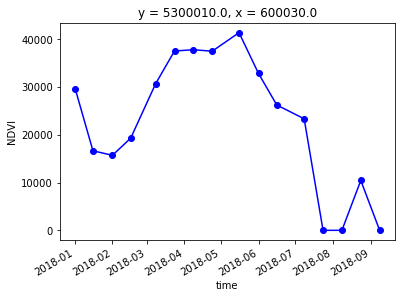

In [5]:
ds.isel(x=0, y=0).NDVI.plot.line('b-o')